In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
import ds_functions as ds


 ORAL_chi


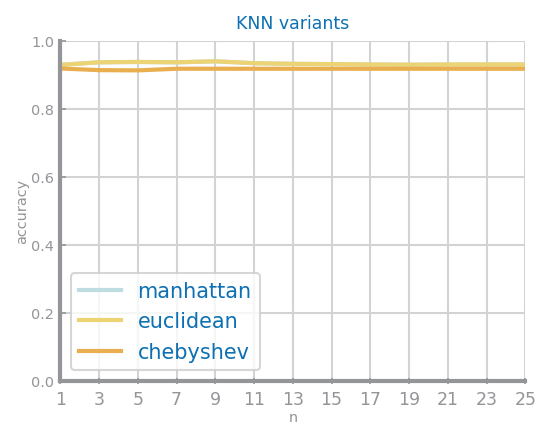

Best results with 9 neighbors and manhattan
An acc of 0.94%

 ORAL_extraTreeClassifier


In [ ]:
import os

directory = '../../datasets/TO_TEST/ORAL/reduced'

overall_accs = []
datasets = []

n_holdouts = 10

nvalues = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]
dist = ['manhattan', 'euclidean', 'chebyshev']
    
for filename in os.listdir(directory):
    if filename.endswith(".csv"): 
        path = directory + '/' + filename
        print('\n', filename.split('.')[0])
        data: pd.DataFrame = pd.read_csv(path, sep=';', header=None)
        y: np.ndarray = data.pop(data.shape[1] - 1).values # Target Variable
        X: np.ndarray = data.values # Values of each feature on each record
        labels = pd.unique(y)
        
        trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)
        
        values = {}
        best = (0, '')
        last_best = 0
        for d in dist:
            yvalues = []
            for n in nvalues:
                knn = KNeighborsClassifier(n_neighbors=n, metric=d)
                knn.fit(trnX, trnY)
                prdY = knn.predict(tstX)
                yvalues.append(metrics.accuracy_score(tstY, prdY))
                if yvalues[-1] > last_best:
                    best = (n, d)
                    last_best = yvalues[-1]
            values[d] = yvalues

        plt.figure()
        ds.multiple_line_chart(nvalues, values, title='KNN variants', xlabel='n', ylabel='accuracy', percentage=True)
        plt.show()
        print('Best results with %d neighbors and %s'%(best[0], best[1]))
        
        clf = knn = KNeighborsClassifier(n_neighbors=best[0], metric=best[1])
        clf.fit(trnX, trnY)
        prd_trn = clf.predict(trnX)
        prd_tst = clf.predict(tstX)
        ds.plot_evaluation_results(pd.unique(y), trnY, prd_trn, tstY, prd_tst)
        print("An acc of {:.2f}%".format(metrics.accuracy_score(tstY, prd_tst)))
        
        overall_accs += [last_best]
        # Dataset name
        datasets += [filename.split('.')[0]]

In [ ]:
accs = pd.Series(overall_accs)
datasets = list(datasets)

res = {datasets[i]: overall_accs[i] for i in range(len(datasets))}

res = {k: v for k, v in sorted(res.items(), key=lambda item: item[1], reverse=True)}

accs = pd.Series(list(res.values()))

print(accs)

datasets = list(res.keys())
# Plot the figure.
plt.figure(figsize=(12, 8))
ax = accs.plot(kind='bar')
ax.set_title('Max Accuracy by Dataset (between the tested models)')
ax.set_xlabel('Dataset')
ax.set_ylabel('Accuracy')
ax.set_xticklabels(datasets)